In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(<matplotlib.axes._subplots.AxesSubplot at 0x1b0bdefab08>,)

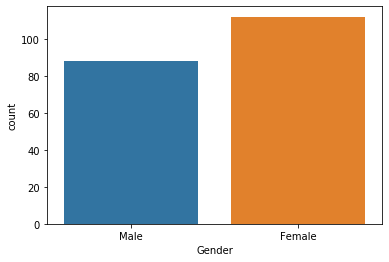

In [8]:
sns.countplot(x='Gender',data=df),

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.columns=['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score']

In [13]:
df


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


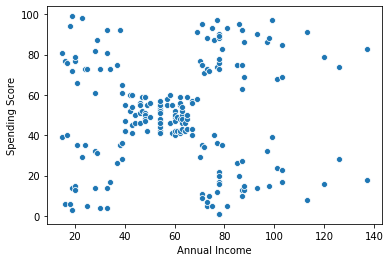

In [16]:
sns.scatterplot(x='Annual Income',y='Spending Score',data=df)

In [17]:
df.corr()

,CustomerID,Age,Annual Income,Spending Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income,0.977548,-0.012398,1.000000,0.009903
Spending Score,0.013835,-0.327227,0.009903,1.000000


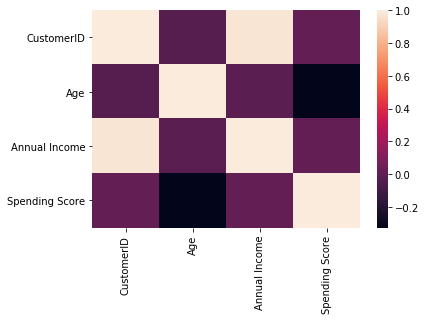

In [19]:
sns.heatmap(df.corr())

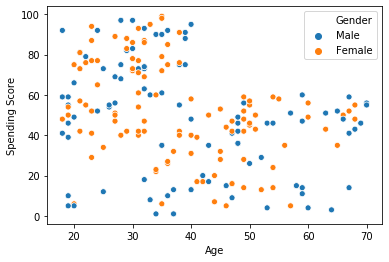

In [21]:
sns.scatterplot(x='Age',y='Spending Score',data=df,hue='Gender')

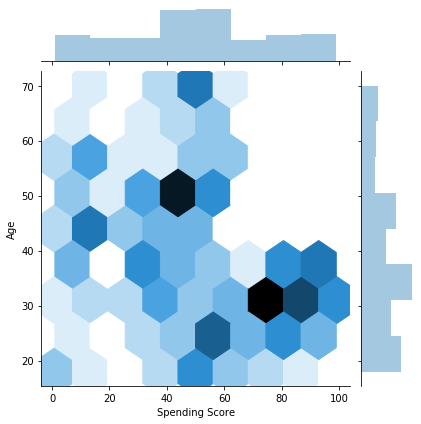

In [25]:
sns.jointplot(x='Spending Score',y='Age',kind='hex',data=df)

In [26]:
pd.value_counts(df['Spending Score'])

42    8
55    7
46    6
73    6
35    5
     ..
31    1
82    1
24    1
23    1
99    1
Name: Spending Score, Length: 84, dtype: int64

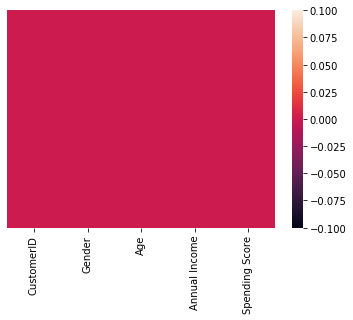

In [27]:
sns.heatmap(df.isnull(),yticklabels=False)

In [29]:
from sklearn.cluster import KMeans

C:\Users\HP\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HP\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HP\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [84]:
kmeans=KMeans(n_clusters=2)

In [85]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Male,Male
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,1


In [86]:
gender_dum=pd.get_dummies(df['Gender'],drop_first=True)

In [87]:
gender_dum

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [88]:
df=pd.concat([df,gender_dum],axis=1)

In [89]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score,Male,Male,Male
0,1,Male,19,15,39,1,1,1
1,2,Male,21,15,81,1,1,1
2,3,Female,20,16,6,0,0,0
3,4,Female,23,16,77,0,0,0
4,5,Female,31,17,40,0,0,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,0
196,197,Female,45,126,28,0,0,0
197,198,Male,32,126,74,1,1,1
198,199,Male,32,137,18,1,1,1


In [90]:
X=df.drop(['CustomerID','Gender'],axis=1)

In [91]:
p=kmeans.fit(X)

In [92]:
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [93]:
kmeans.cluster_centers_

array([[46.16521739, 59.36521739, 32.88695652,  0.43478261,  0.43478261,
         0.43478261],
       [28.95294118, 62.17647059, 73.62352941,  0.44705882,  0.44705882,
         0.44705882]])

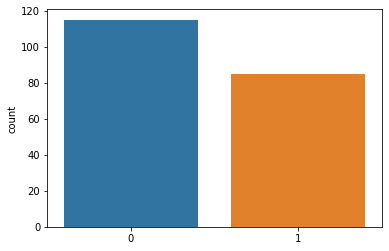

In [94]:
sns.countplot(kmeans.labels_)

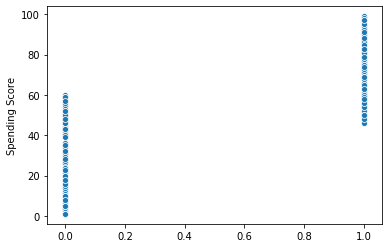

In [95]:
sns.scatterplot(x=kmeans.labels_,y='Spending Score',data=df)